In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 0.24.1
numpy version: 1.16.5
matplotlib version: 3.1.2


## base_dis

In [2]:
drought_base_dis = pd.read_csv('Drought_base_dis.csv',index_col=0)
drought_base_dis.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,0.506419,0.502393,0.500013,0.505589,0.496928,0.494077,0.503538,0.506187,0.494572,0.504725,...,0.504308,0.496200,0.498682,0.500578,0.495678,0.495496,0.500018,0.506438,0.497937,0.496285
1,0.507446,0.502855,0.500783,0.506153,0.497228,0.495083,0.504535,0.507193,0.494950,0.504932,...,0.505411,0.496634,0.499188,0.501192,0.496395,0.496304,0.500337,0.506697,0.498661,0.497015
2,0.508281,0.503222,0.501538,0.506628,0.497713,0.495927,0.505103,0.507569,0.495078,0.505439,...,0.506387,0.497425,0.499630,0.501389,0.496851,0.496801,0.500784,0.507135,0.499106,0.497517
3,0.508774,0.503537,0.502112,0.506926,0.498188,0.496638,0.505711,0.507909,0.495827,0.505798,...,0.506998,0.497906,0.500141,0.501744,0.497153,0.497378,0.501183,0.507534,0.499809,0.498171
4,0.509267,0.503994,0.502395,0.507332,0.498651,0.497187,0.506007,0.507976,0.496522,0.506254,...,0.507843,0.498405,0.500475,0.502081,0.497552,0.497797,0.501394,0.507634,0.500154,0.498523


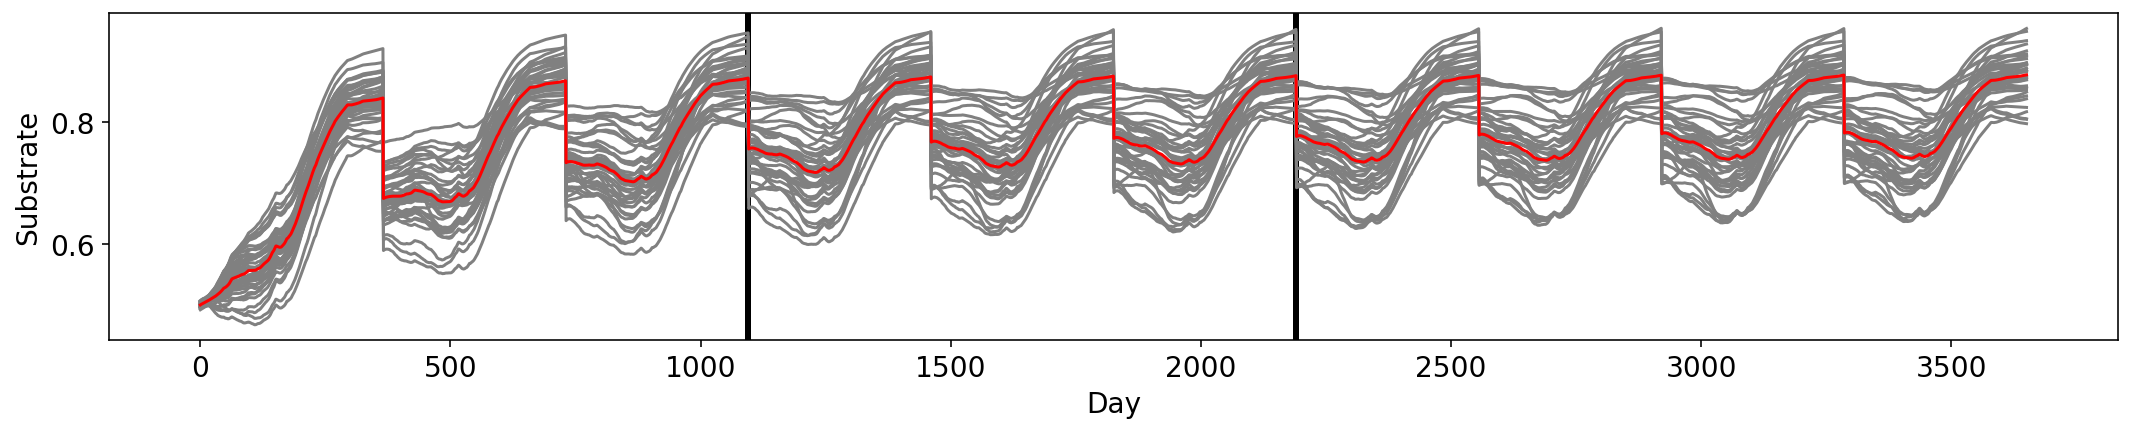

In [5]:
fig,ax = plt.subplots(1,1,figsize=(18,3))

ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)

ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(drought_base_dis.shape[1]):
    ax.plot(drought_base_dis.iloc[:,replicate],color='grey')
ax.plot(drought_base_dis.mean(axis=1),color='red')

plt.show()

## basex10_dis

In [6]:
drought_basex10_dis = pd.read_csv('Drought_basex10_dis.csv',index_col=0)
drought_basex10_dis.head()

,20201,20202,20203,20204,20205,20206,20208,20209,202010,202011,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,0.506419,0.502393,0.500013,0.505589,0.496928,0.494077,0.506187,0.494572,0.504725,0.496894,...,0.504308,0.496200,0.498682,0.500578,0.495678,0.495496,0.500018,0.506438,0.497937,0.496285
1,0.507446,0.502855,0.500783,0.506153,0.497228,0.495083,0.507193,0.494950,0.504932,0.497537,...,0.505411,0.496634,0.499188,0.501192,0.496395,0.496304,0.500337,0.506697,0.498661,0.497015
2,0.508281,0.503222,0.501538,0.506628,0.497713,0.495927,0.507569,0.495078,0.505439,0.498125,...,0.506387,0.497425,0.499630,0.501389,0.496851,0.496801,0.500784,0.507135,0.499106,0.497517
3,0.508774,0.503537,0.502112,0.506926,0.498188,0.496638,0.507909,0.495827,0.505798,0.498759,...,0.506998,0.497906,0.500141,0.501744,0.497153,0.497378,0.501183,0.507534,0.499809,0.498171
4,0.509267,0.503994,0.502395,0.507332,0.498651,0.497187,0.507976,0.496522,0.506254,0.499219,...,0.507843,0.498405,0.500475,0.502081,0.497552,0.497797,0.501394,0.507634,0.500154,0.498523


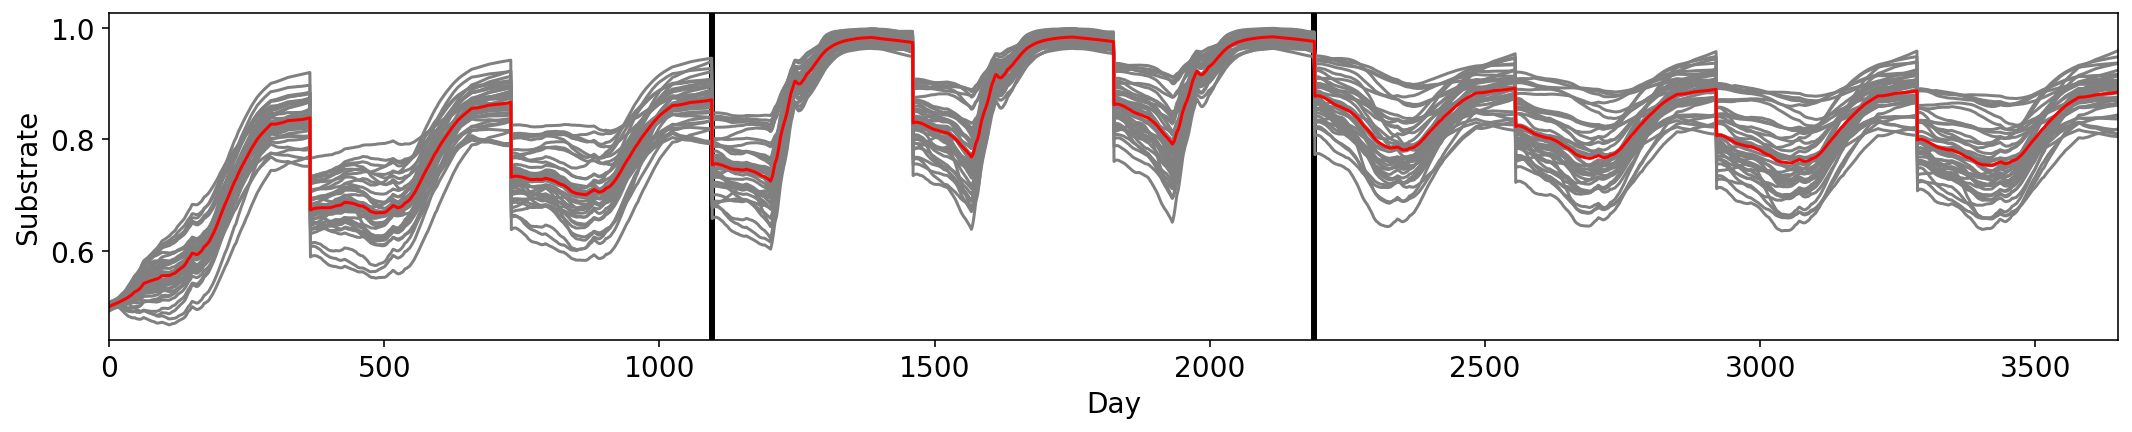

In [8]:
fig,ax = plt.subplots(1,1,figsize=(18,3))

ax.tick_params(axis='both',labelsize=14,bottom=True,labelbottom=True)
ax.set_xlim(0,365*10)

ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(drought_basex10_dis.shape[1]):
    ax.plot(drought_basex10_dis.iloc[:,replicate],color='grey')
ax.plot(drought_basex10_dis.mean(axis=1),color='red')

plt.show()

### Re-assemble a dataset of years 3, 6, & 9

In [9]:
index_3   = [i for i in range(365*2+1,365*3+1)]
index_6   = [i for i in range(365*5+1,365*6+1)]
index_9   = [i for i in range(365*8+1,365*9+1)]
index_369 = index_3 + index_6 + index_9

In [10]:
drought_base_dis369    = drought_base_dis.iloc[index_369,:].reset_index(drop=True)

drought_basex10_dis369 = drought_basex10_dis.iloc[index_369,:].reset_index(drop=True)

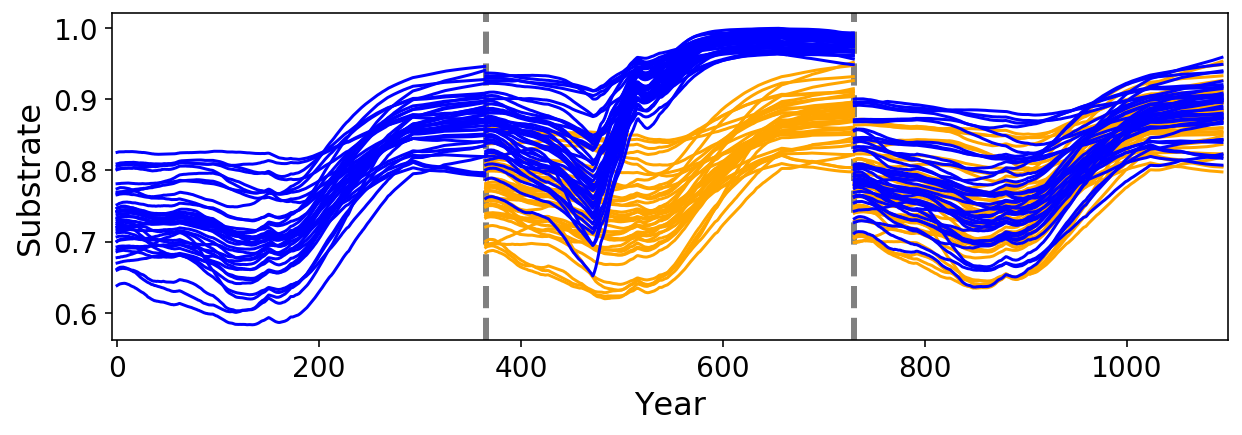

In [11]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Substrate',size=16)
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


for replicate in range(drought_base_dis369.shape[1]):
    #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
    ax.plot(drought_base_dis369.iloc[365*1:365*2,replicate],color='orange')
    ax.plot(drought_base_dis369.iloc[365*2:365*3,replicate],color='orange')
    

for replicate in range(drought_basex10_dis369.shape[1]):
    ax.plot(drought_basex10_dis369.iloc[0:365*1,    replicate],color='blue')
    ax.plot(drought_basex10_dis369.iloc[365*1:365*2,replicate],color='blue')
    ax.plot(drought_basex10_dis369.iloc[365*2:365*3,replicate],color='blue')

plt.show()

### define confidence interval function

In [12]:
def confi_interval(df):
    alpha = 0.05
    
    lower = df.apply(
        lambda df: df.mean() - (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1
    )
    upper = df.apply(lambda df: df.mean() + (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1)
    
    return lower,upper

In [13]:
bound369    = confi_interval(drought_base_dis369.iloc[:,:])

boundx10369 = confi_interval(drought_basex10_dis369.iloc[:,:])

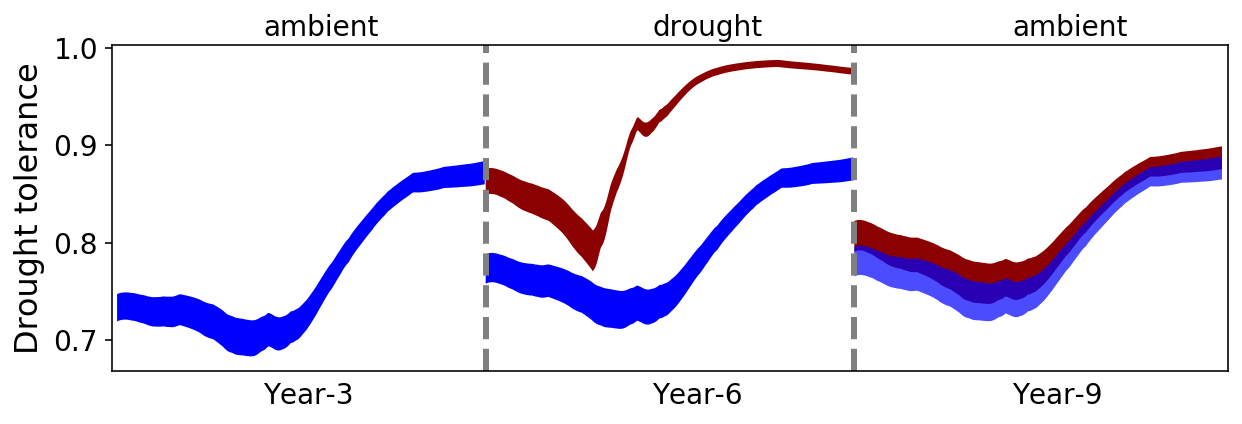

In [19]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
#ax.set_ylim(0.8,1.0)

ax.tick_params(bottom=False,labelbottom=False)    
#ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#ax.set_xlabel('Year',size=16)
ax.set_ylabel("Drought tolerance",size=16,weight='normal', color='k')
plt.figtext(0.23,0.05,'Year-3',fontsize=14)
plt.figtext(0.50,0.05,'Year-6',fontsize=14)
plt.figtext(0.75,0.05,'Year-9',fontsize=14)

plt.figtext(0.23,0.9,'ambient',fontsize=14)
plt.figtext(0.50,0.9,'drought',fontsize=14)
plt.figtext(0.75,0.9,'ambient',fontsize=14)


ax.fill_between(x=drought_basex10_dis369.index[365*1:365*2],y1=boundx10369[0][365*1:365*2],y2=boundx10369[1][365*1:365*2], facecolor='darkred',alpha=1.0)
ax.fill_between(x=drought_basex10_dis369.index[365*2:365*3],y1=boundx10369[0][365*2:365*3],y2=boundx10369[1][365*2:365*3], facecolor='darkred',alpha=1.0)


ax.fill_between(x=drought_base_dis369.index[365*0:365*1], y1=bound369[0][365*0:365*1],y2=bound369[1][365*0:365*1],facecolor='blue', alpha=1.0) 
ax.fill_between(x=drought_base_dis369.index[365*1:365*2], y1=bound369[0][365*1:365*2],y2=bound369[1][365*1:365*2],facecolor='blue', alpha=1.0) 
ax.fill_between(x=drought_base_dis369.index[365*2:365*3], y1=bound369[0][365*2:365*3],y2=bound369[1][365*2:365*3],facecolor='blue', alpha=0.7) 

#ax.legend()

#plt.savefig('legacy_sub.pdf',bbox_inches='tight')

plt.show()